【問題1】コンペティション内容の把握

Home Creditはどのような企業？

銀行口座を持たない人にも融資をする企業

このコンペティションでは何を予測する？

クライアントの返済能力を予測します

それを予測することで企業が得られるメリットは何？

返済可能なクライアントが拒否されないようにし、クライアントが成功するための元本、満期、および返済カレンダーを使用してローンが提供されるようにします。そうする事により、企業としても利益の取りこぼしを軽減できる。

【問題2】データの概観の把握

.head()、.info()、describe()などを使う

In [47]:
import missingno as msno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("application_train.csv")

In [48]:
print(df.head(10))

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2     

In [49]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


In [50]:
print(df.describe())

          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05  

信用情報のCREDITに関わる項目の欠損値が多く見受けられる

欠損値の有無を見る

In [51]:
print(df.isnull().sum())

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64


やはり信用情報のCREDITに関わる項目の欠損値が多く見受けられる

クラスの割合がわかるグラフを描く

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


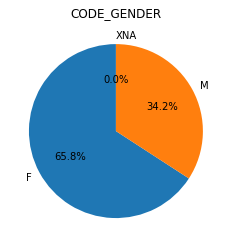

In [52]:
print(df["CODE_GENDER"].value_counts())

plt.title("CODE_GENDER")
label = ["F","M","XNA"]
plt.pie(df["CODE_GENDER"].value_counts(),labels =label,startangle=90,autopct="%1.1f%%")  # 「リスト名」のところにリストの変数名を入れる
plt.show()  # com + con + enter

男女比は女性の方が男性の約２倍にもなっている

【問題3】課題設定

男女比の関係性(gender)はあるのか

年収(AMT_INCOME_TOTALは影響するのか

未婚、既婚の状況の影響

職業（OCCUPATION_TYPE)の影響

【問題4】データ探索

目的変数

過去に滞納の履歴があるかどうか

1: 支払が困難なクライアント = クライアントが最初のY回の分割払いの内に少なくとも一回でX日以上延滞していた場合

0: それ以外の場合

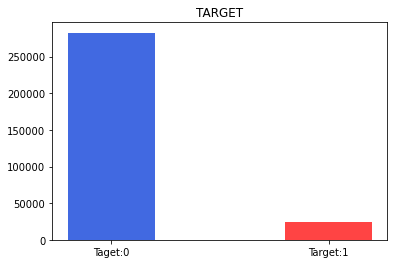

In [53]:
plt.title("TARGET")
label = ["Taget:0","Target:1"]
plt.bar(np.array([2,2.5]),df["TARGET"].value_counts(),width=0.2,color=["#4169e1","#ff4444"],tick_label =label)  # 「リスト名」のところにリストの変数名を入れる
plt.show()  # com + con + enter

各特徴量と比較する為の関数

In [54]:
def gp(col, title):
    """
    グループ化棒グラフを表示
    col: 表示する列
    title: 図のタイトル
    """
    df1 = df[df["TARGET"] == 1]
    df0 = df[df["TARGET"] == 0]
    a1 = df1[col].value_counts()
    b1 = df0[col].value_counts()
    
    trace1 = plt.bar(x=a1.index,height=a1, label ='Target : 1',color="#44ff54",align ="edge",width =-0.3)
    trace2 = plt.bar(x=b1.index,height=b1, label ='Target : 0',color="#ff4444",align ="edge",width =0.3)
    plt.legend()
    plt.title(title)
    plt.show()

各特徴量の比較グラフの関数

In [55]:
def en(col,title):
    '''
    グループの円グラフ
    col: 表示する列
    title: 図のタイトル
    '''
    plt.title(title)
    a1 = df[col].value_counts()
    a1.plot.pie(startangle=90,autopct="%1.1f%%")
    plt.show()  # com + con + enter

婚姻関係との比較

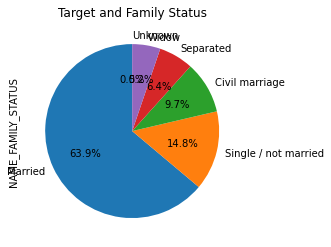

In [56]:
en('NAME_FAMILY_STATUS', 'Target and Family Status')

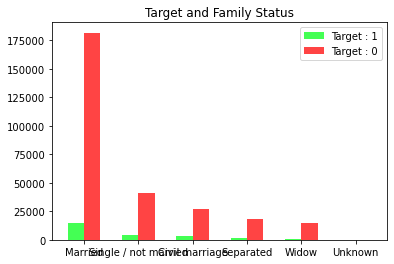

In [57]:
gp('NAME_FAMILY_STATUS', 'Target and Family Status')

既婚者が多くを占めている

居住タイプとの比較

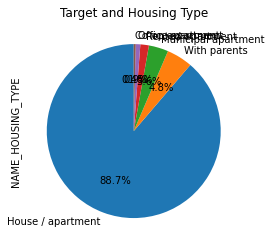

In [58]:
en('NAME_HOUSING_TYPE', 'Target and Housing Type')

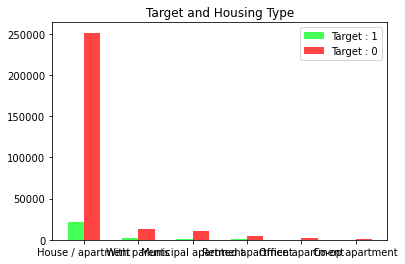

In [59]:
gp('NAME_HOUSING_TYPE', 'Target and Housing Type')

持ち家/アパートが多くを占めている

男女比との比較

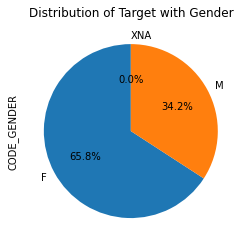

In [60]:
en('CODE_GENDER','Distribution of Target with Gender')

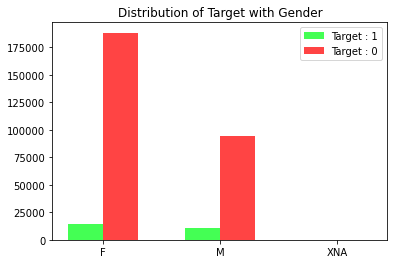

In [61]:
gp('CODE_GENDER','Distribution of Target with Gender') # 図のタイトル

女性が多くを占めている

車所有率との比較

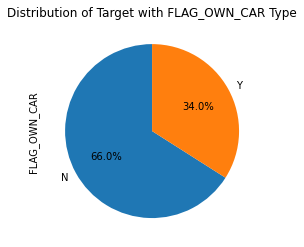

In [62]:
en('FLAG_OWN_CAR', 'Distribution of Target with FLAG_OWN_CAR Type')

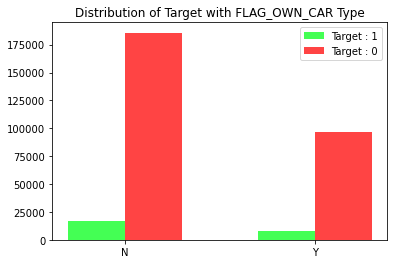

In [63]:
gp('FLAG_OWN_CAR', 'Distribution of Target with FLAG_OWN_CAR Type')

車所有率は高くはない

土地所有率との比較

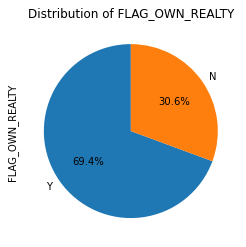

In [64]:
en("FLAG_OWN_REALTY","Distribution of FLAG_OWN_REALTY")

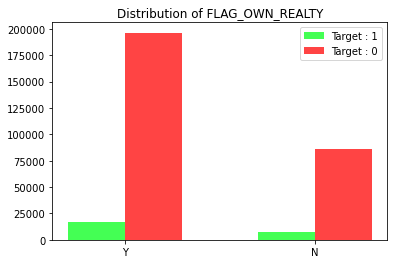

In [65]:
gp("FLAG_OWN_REALTY","Distribution of FLAG_OWN_REALTY")

土地の所有率は倍以上ある

職業との関連性

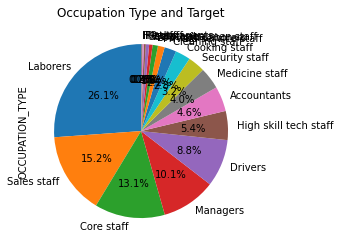

In [66]:
en('OCCUPATION_TYPE', 'Occupation Type and Target')

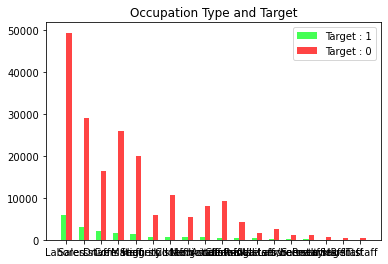

In [67]:
gp('OCCUPATION_TYPE', 'Occupation Type and Target')

労働者がダントツで多い

労働形態との比較

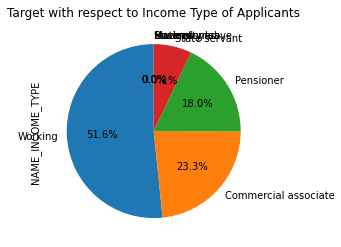

In [68]:
en('NAME_INCOME_TYPE', 'Target with respect to Income Type of Applicants')

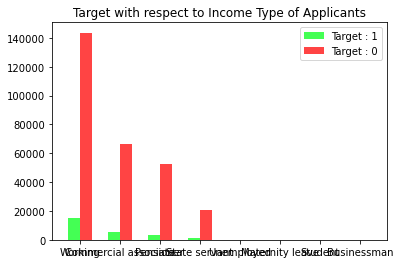

In [69]:
gp('NAME_INCOME_TYPE', 'Target with respect to Income Type of Applicants')

労働者、次いで商業従事者が多い

借金の分布

/Users/daisukesatou/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of AMT_CREDI'}, xlabel='AMT_CREDIT', ylabel='Density'>

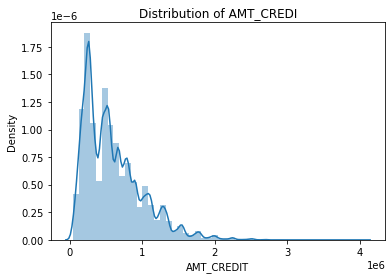

In [70]:
 import seaborn as sns

plt.title("Distribution of AMT_CREDI")
sns.distplot(df["AMT_CREDIT"],kde = True)

少額の債務を抱えてる場合が多い

In [ ]:
年齢の分布

/Users/daisukesatou/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of DAYS_BIRTHI'}, xlabel='DAYS_BIRTH', ylabel='Density'>

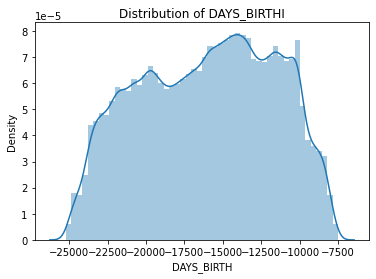

In [73]:
plt.title("Distribution of DAYS_BIRTHI")
sns.distplot(df["DAYS_BIRTH"],kde = True)

In [ ]:
全世代に渡って利用者がいることが見受けられる